In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from Planet.data import PlanetDataCollection
from Planet.utils import get_transforms
from Planet.train import NNTrainer
from torchvision import models
from pathlib import Path

In [3]:
path = Path('/home/anukoolpurohit/Documents/AnukoolPurohit/Datasets/Planet')

In [4]:
tfms = get_transforms()

In [5]:
data = PlanetDataCollection.from_csv(path, 'train_v2.csv', 'train-jpg',
                           tfms, name_col='image_name', label_col='tags',
                           delimter=' ',bs=64,test_folder='test-jpg')

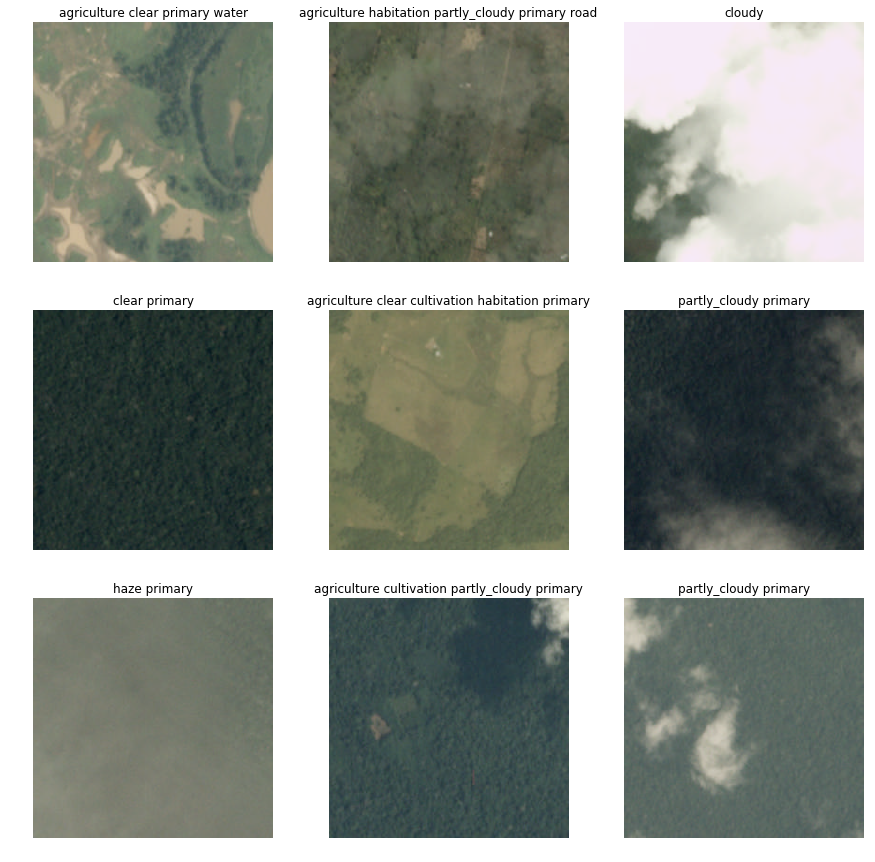

In [6]:
data.show()

In [7]:
def get_df(preds, data, thresh=0.2):
    labeled_preds = [' '.join([data.train_ds.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
    fnames = data.test_ds.x.items
    df = pd.DataFrame({'image_name': fnames, 'tags': labeled_preds}, columns=['image_name', 'tags'])
    df['extra'] = df['image_name'].str.split('_', n=1, expand=True)[1]
    df['extra'] = df['extra'].astype(float)
    df.sort_values(by='extra', inplace=True)
    df.drop(columns='extra', inplace=True)
    return df

In [8]:
arch = models.resnet50

In [9]:
trainer = NNTrainer(data,arch)

In [10]:
trainer.train(1e-03,2)

                    Epoch            Training Loss          Validation Loss
                        1                 0.171405                 0.147400


                        2                 0.153224                 0.146756


In [12]:
trainer.train(1e-05,2)

                    Epoch            Training Loss          Validation Loss
                        1                 0.135313                 0.131031


                        2                 0.135002                 0.130855


In [ ]:
trainer.save('frozen1')

In [ ]:
trainer.unfreeze()

In [ ]:
trainer.train(1e-05,4)

In [ ]:
trainer.train(1e-06,2)

In [ ]:
trainer.save('done')

In [ ]:
preds = trainer.predict_test()

In [ ]:
df = get_df(preds,data)

In [ ]:
data2 = PlanetDataCollection.from_csv(path, 'train_v2.csv', 'train-jpg',
                           tfms, name_col='image_name', label_col='tags',
                           delimter=' ',bs=64,test_folder='test-jpg-additional')

trainer.data = data2

In [ ]:
preds2 = trainer.predict_test()

In [ ]:
df2 = get_df(preds2, data2)

In [ ]:
df3 = pd.concat([df, df2])

In [ ]:
df3.to_csv('strange_submission.csv', index=False)

In [ ]:
print(f"%.6f"% 20)